4. How do charismatic people present themselves ?





In [ ]:
from google.colab import drive
import os
import pandas as pd
import matplotlib.pyplot as plt
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file1 = '/content/drive/MyDrive/Dating App Dataset/users_api-results.csv'
users_instances = pd.read_csv(file1)
users_instances

,gender,genderLooking,age,name,counts_details,counts_pictures,counts_profileVisits,counts_kisses,counts_fans,counts_g,...,shareProfileEnabled,lastOnlineDate,lastOnlineTime,birthd,crypt,freetext,whazzup,pictureId,userId,isSystemProfile
0,F,M,25,daeni,1.00,4,8279,239,0,3,...,1,2015-04-25T20:43:26Z,1.429995e+09,0,NaN,Nur tote Fisch schwimmen mit dem Strom,Nur tote fische schwimmen mit dem strom,4e3842f79b70e7ea57000064,55303fc3160ba0eb728b4575,NaN
1,F,M,22,italiana 92,0.85,5,663,13,0,0,...,1,2015-04-26T09:19:35Z,1.430040e+09,0,NaN,NaN,Primaveraaa<3,4e3d34bf5d2bce7b160006a3,552e7b61c66da10d1e8b4c82,NaN
2,F,M,21,Lauraaa,0.00,4,1369,88,0,2,...,1,2015-04-06T14:24:07Z,1.428330e+09,0,NaN,NaN,NaN,4ec96c090dc82cb25d00000a,54a584ecc56da128638b4674,NaN
3,F,none,20,Qqkwmdowlo,0.12,3,22187,1015,2,3,...,1,2015-04-07T11:21:01Z,1.428406e+09,0,NaN,NaN,Je pense donc je suis. Instagram quedev,4eef8b81ebf2c8f64000000c,54c92738076ea1b5338b4735,NaN
4,F,M,21,schaessie {3,0.15,12,35262,1413,9,12,...,1,2015-04-06T14:25:20Z,1.428330e+09,0,NaN,NaN,Instagram: JESSSIESCH,4ef3cc5aa9d0b3d07d000017,54e1a6f6c76da135748b4a3a,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3968,F,M,21,B**f,0.85,1,280,15,0,0,...,1,2015-04-07T00:08:59Z,1.428365e+09,0,1.0,NaN,NaN,CRYqKLbQ1+pd5CVSmGGccV+EggT4oGRmaXWhnn5jhMg9Jz...,cb958a9459216acd4dd06f213fe63685,NaN
3969,F,M,20,Ma**e,1.00,8,1014,43,3,0,...,1,2015-04-06T07:54:34Z,1.428307e+09,0,1.0,NaN,Marie ॐ 🎉Goa. ...,CRYq7MGpxHpEKfWhmwJygGmRNadHkC9XxPjktwvaiLm6Te...,d5a7edbcb59fcb092871bdcde7f142ca,NaN
3970,F,M,20,Ma**e,1.00,8,1101,46,3,0,...,1,2015-04-06T07:54:34Z,1.428307e+09,0,1.0,NaN,Marie ॐ 🎉Goa. ...,CRYVOrW7zgSV+NPGili4nZeREmQ0rAAXCZunTXp9KRLat1...,d5a7edbcb59fcb092871bdcde7f142ca,NaN
3971,F,M,23,Eni**n,0.96,8,8702,142,0,0,...,0,2015-04-06T15:47:15Z,1.428335e+09,0,1.0,NaN,ruhig shriebe😉. bissä ni,CRYsH4q+r4fCkC8+leJqDdJQtbUNQGCyqLx36aDsEzC5b9...,e532a6060fe4e5902c66086d905a9d53,NaN


In [ ]:
users_instances.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3973 entries, 0 to 3972
Data columns (total 42 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  3973 non-null   object 
 1   genderLooking           3973 non-null   object 
 2   age                     3973 non-null   int64  
 3   name                    3973 non-null   object 
 4   counts_details          3973 non-null   float64
 5   counts_pictures         3973 non-null   int64  
 6   counts_profileVisits    3973 non-null   int64  
 7   counts_kisses           3973 non-null   int64  
 8   counts_fans             3973 non-null   int64  
 9   counts_g                3973 non-null   int64  
 10  flirtInterests_chat     3973 non-null   bool   
 11  flirtInterests_friends  3973 non-null   bool   
 12  flirtInterests_date     3973 non-null   bool   
 13  country                 3973 non-null   object 
 14  city                    3686 non-null   

In [ ]:
users_instances = users_instances.query('age not in [18, 27, 28]')

In [ ]:
import numpy as np

def safe_divide_vectorized(numerator, denominator):
    return np.where(
        (numerator == 0) & (denominator == 0), 0,np.where(denominator == 0, 0, numerator / denominator))

users_instances["engagement_rate"] = np.round(
    safe_divide_vectorized(
        users_instances["counts_kisses"] + users_instances["counts_fans"],
        users_instances["counts_profileVisits"]
    ),
    2
)
users_instances["engagement_rate"] = users_instances["engagement_rate"].apply(lambda x: f"{x:.2f}")

users_instances["picture_effectiveness"] = np.round(
    safe_divide_vectorized(
        (users_instances["counts_kisses"] + users_instances["counts_fans"] ) ,
        users_instances["counts_pictures"]
        ),
   2)

users_instances["engagement_rate"] = pd.to_numeric(users_instances["engagement_rate"], errors="coerce")
users_instances["picture_effectiveness"] = pd.to_numeric(users_instances["picture_effectiveness"], errors="coerce")
users_instances["charisma_score"] = round(
    ((users_instances["engagement_rate"] * 0.6) + (users_instances["picture_effectiveness"] * 0.4)) / 2, 2
)

users_instances['is_charismatic'] = users_instances['charisma_score'] > users_instances['charisma_score'].median()
charismatic_users = users_instances[users_instances['is_charismatic'] == True]
non_charismatic_users = users_instances[users_instances['is_charismatic'] == False]

<ipython-input-5-4953c3065480>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  users_instances["engagement_rate"] = np.round(
<ipython-input-5-4953c3065480>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  users_instances["engagement_rate"] = users_instances["engagement_rate"].apply(lambda x: f"{x:.2f}")
<ipython-input-5-4953c3065480>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

Gender/GenderLooking: Explore if charisma varies by gender or the gender they are looking for. Analyze patterns in their presentation styles.

In [ ]:
gender_charisma = users_instances.groupby('gender')['is_charismatic'].mean().reset_index()
genderLooking_charisma = users_instances.groupby('genderLooking')['is_charismatic'].mean().reset_index()

print("Charisma by Gender:")
print(gender_charisma)

print("\nCharisma by GenderLooking:")
print(genderLooking_charisma)

Charisma by Gender:
  gender  is_charismatic
0      F        0.498992

Charisma by GenderLooking:
  genderLooking  is_charismatic
0             F        0.400000
1             M        0.498596
2          both        0.631579
3          none        0.502732


Charismatic users are tend to look for both the genders

Determine if charisma correlates with age or certain age groups presenting themselves differently.


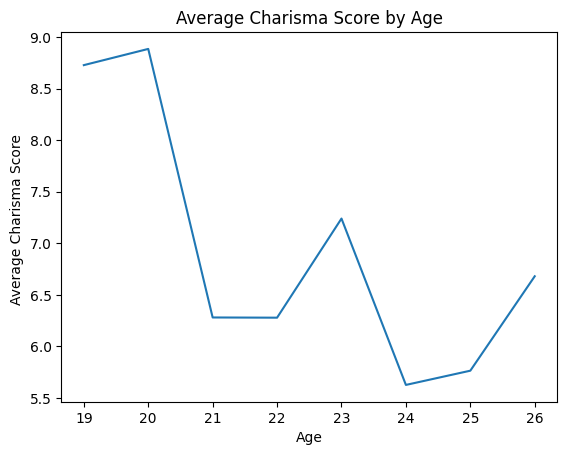

In [ ]:
age_vs_charisma = users_instances.groupby('age')['charisma_score'].mean()

plt.plot(age_vs_charisma.index, age_vs_charisma.values)
plt.xlabel('Age')
plt.ylabel('Average Charisma Score ')
plt.title('Average Charisma Score by Age')
plt.show()

In younger age group , charismatic score is high

Profile Completeness: Use variables like counts_details, counts_pictures, and freetext to assess whether charismatic people tend to have more detailed profiles or include more pictures.

<ipython-input-14-62ecb2f3bd22>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  users_instances['charisma_score'] = users_instances['engagement_rate'] * users_instances['picture_effectiveness']  # Example charisma score
<ipython-input-14-62ecb2f3bd22>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['profile_completeness'] = (
<ipython-input-14-62ecb2f3bd22>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

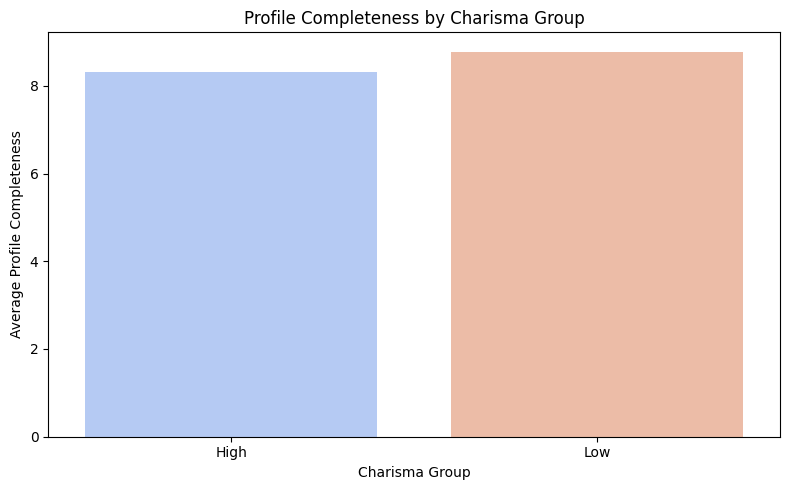

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

users_instances['charisma_score'] = users_instances['engagement_rate'] * users_instances['picture_effectiveness']  # Example charisma score

# Drop rows with missing values in relevant columns
df = users_instances.dropna(subset=['counts_details', 'counts_pictures', 'freetext', 'charisma_score'])

# Create a profile completeness score (you can adjust weights as needed)
df['profile_completeness'] = (
    df['counts_details'] +
    df['counts_pictures'] +
    df['freetext'].notnull().astype(int)  # 1 if freetext is non-null, 0 otherwise
)

median_charisma = df['charisma_score'].median()
df['charisma_group'] = df['charisma_score'].apply(lambda x: 'High' if x > median_charisma else 'Low')

# Calculate average profile completeness for each group
completeness_by_charisma = df.groupby('charisma_group')['profile_completeness'].mean().reset_index()

# Visualize the results
plt.figure(figsize=(8, 5))
sns.barplot(x='charisma_group', y='profile_completeness', data=completeness_by_charisma, palette='coolwarm')
plt.title('Profile Completeness by Charisma Group')
plt.xlabel('Charisma Group')
plt.ylabel('Average Profile Completeness')
plt.tight_layout()
plt.show()



In [ ]:
completeness_by_charisma

,charisma_group,profile_completeness
0,High,8.319464
1,Low,8.779821


Observations:
- Users in the Low Charisma group have a slightly higher profile completeness score (8.78) compared to those in the High Charisma group (8.32).
- This suggests that charisma might not strongly correlate with profile completeness as measured by counts_details, counts_pictures, and freetext. In fact, those with higher charisma scores appear to have slightly less profile completeness.

Possible Interpretations:
- Quality vs. Quantity: Highly charismatic users may focus on quality content rather than filling out all profile sections or uploading numerous pictures.
- Minimalism Attracts: A more streamlined profile might make them appear more charismatic by leaving some mystery.
- External Factors: Charisma might be driven more by factors like engagement style, profile picture quality, or interactions, rather than profile completeness.

Charismatic users might have:
Better profile content (e.g., quality pictures, engaging bios).
Higher activity levels or interactions with others, leading to reciprocation.
More influential or popular networks.

Flirt Interests: Check if charismatic people tend to indicate more interests in flirtInterests_chat, flirtInterests_friends, and flirtInterests_date.

   is_charismatic  flirtInterests_chat  flirtInterests_friends  \
0           False             0.686275                0.686275   
1            True             0.704918                0.639344   

   flirtInterests_date  
0             0.490196  
1             0.360656  


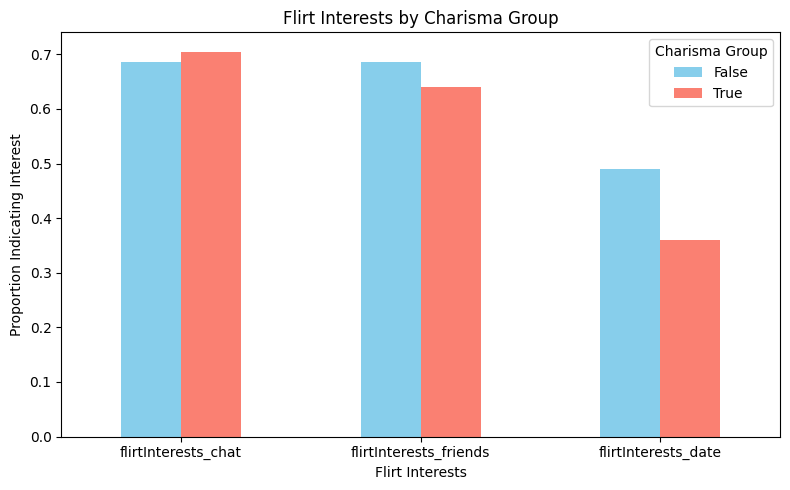

In [ ]:
flirt_interests = ['flirtInterests_chat', 'flirtInterests_friends', 'flirtInterests_date']
flirt_by_charisma = df.groupby('is_charismatic')[flirt_interests].mean().reset_index()

print(flirt_by_charisma)

# Visualize the results
flirt_by_charisma.set_index('is_charismatic').T.plot(kind='bar', figsize=(8, 5), color=['skyblue', 'salmon'])
plt.title('Flirt Interests by Charisma Group')
plt.ylabel('Proportion Indicating Interest')
plt.xlabel('Flirt Interests')
plt.xticks(rotation=0)
plt.legend(title='Charisma Group')
plt.tight_layout()
plt.show()

Charismatic people focus more on chatting: Higher interest in chatting aligns with their tendency to engage more dynamically.
Non-charismatic users may rely on explicit interests: They show a higher tendency to state friendship and dating interests, possibly to compensate for lower engagement through other means.

In [ ]:
users_instances['isSystemProfile'].unique()

array([nan])

Engagement Drivers

In [ ]:
new_vs_established = users_instances.groupby('isNew')['charisma_score'].mean().reset_index()
vip_vs_non_vip = users_instances.groupby('isVip')['charisma_score'].mean().reset_index()
charisma_share = users_instances.groupby('is_charismatic')['shareProfileEnabled'].mean().reset_index()
sys_profile = users_instances.groupby('is_charismatic')['isSystemProfile'].mean().reset_index()

print("Charisma by New vs Established Users:")
print(new_vs_established)

print("\nCharisma by VIP vs Non-VIP Users:")
print(vip_vs_non_vip)

print("Profile Sharing by Charismatic vs Non-Charismatic Users:")
print(charisma_share)

print("System Created Profile by Charismatic vs Non-Charismatic Users:")
print(sys_profile)

Charisma by New vs Established Users:
   isNew  charisma_score
0      0        2.345831
1      1        1.144271

Charisma by VIP vs Non-VIP Users:
   isVip  charisma_score
0      0        2.067927
1      1        1.608520
Profile Sharing by Charismatic vs Non-Charismatic Users:
   is_charismatic  shareProfileEnabled
0           False             0.972348
1            True             0.950025
System Created Profile by Charismatic vs Non-Charismatic Users:
   is_charismatic  isSystemProfile
0           False              NaN
1            True              NaN


New vs Established Users:

- Established users have a significantly higher average charisma score (2.35) than new users (1.14).
- This suggests that newer users may still be adjusting their profiles or lack the engagement strategies that established users have developed over time. Charisma could be built as users gain more interactions, refine their profiles, and build relationships within the platform.

VIP vs Non-VIP Users:
- Non-VIP users have a higher charisma score (2.07) than VIP users (1.61).
- This may indicate that VIP status does not necessarily correlate with higher perceived charisma. It's possible that VIP users may have more visibility or tools, but non-VIP users might focus more on engagement, profile quality, and other factors that contribute to charisma.

Sharable Profile is almost similar for both the *users*



Correlation between profile visits and kisses: 0.8859
Correlation between profile visits and fans: 0.1339


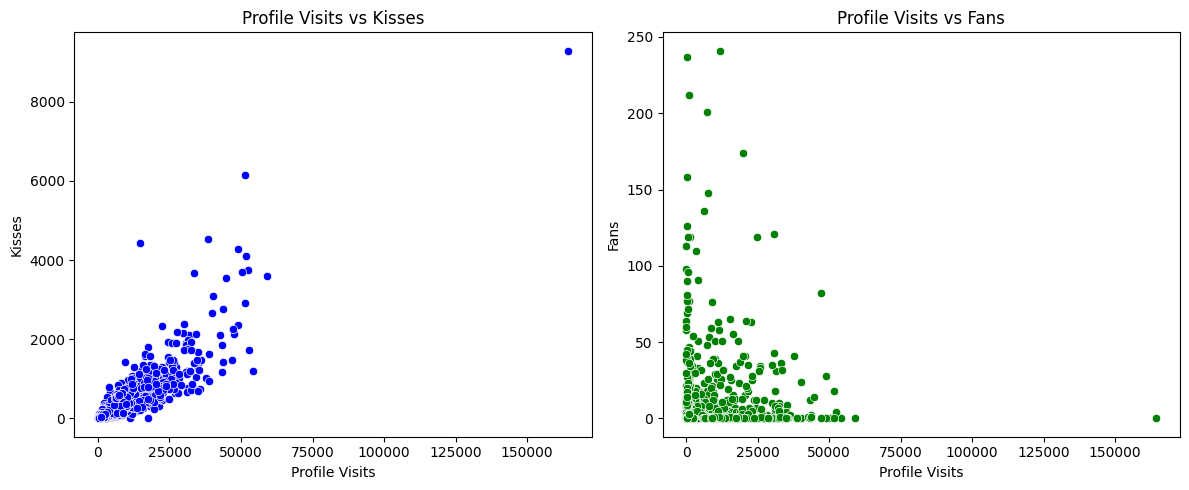

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# Calculate Pearson's correlation between profile visits and engagement metrics (kisses, fans)
corr_visits_kisses, _ = pearsonr(users_instances['counts_profileVisits'], users_instances['counts_kisses'])
corr_visits_fans, _ = pearsonr(users_instances['counts_profileVisits'], users_instances['counts_fans'])

print(f"Correlation between profile visits and kisses: {corr_visits_kisses:.4f}")
print(f"Correlation between profile visits and fans: {corr_visits_fans:.4f}")

# Create scatter plots to visualize relationships
plt.figure(figsize=(12, 5))

# Scatter plot for profile visits vs kisses
plt.subplot(1, 2, 1)
sns.scatterplot(x=users_instances['counts_profileVisits'], y=users_instances['counts_kisses'], color='blue')
plt.title('Profile Visits vs Kisses')
plt.xlabel('Profile Visits')
plt.ylabel('Kisses')

# Scatter plot for profile visits vs fans
plt.subplot(1, 2, 2)
sns.scatterplot(x=users_instances['counts_profileVisits'], y=users_instances['counts_fans'], color='green')
plt.title('Profile Visits vs Fans')
plt.xlabel('Profile Visits')
plt.ylabel('Fans')

plt.tight_layout()
plt.show()


Since the correlation is strong (0.8859), we can conclude that users who get more profile visits tend to also receive more kisses. Profile visits could be a good predictor of receiving kisses.

Conclusion:
1. Openness: Charismatic users are open to both genders, showing inclusivity.
2. Youthful Energy: Younger users tend to score higher in charisma, indicating that energy and vibrancy matter.
3 Profile Completeness: While profile details are important, charisma is more about engagement than just having a complete profile.
4. Chat Focus: Charismatic users are more likely to engage in chatting and dynamic conversations, rather than just stating explicit interests.
5. Experience Matters: Established users have higher charisma scores, suggesting experience and interaction quality matter.
6. Non-VIP Advantage: Non-VIP users tend to score higher in charisma, likely due to more creative freedom in their profiles.
7. Profile Visits: More profile visits lead to more kisses, so attracting attention through an engaging profile is key.

Adaptations for Charisma:
1. Be open-minded in interactions.
2. Engage dynamically, focusing on conversations rather than just stating interests.
3. Present youthful energy in your interactions and profile.
4. Develop your profile over time for better engagement.
5. Focus on making your profile attractive to increase profile visits and interactions.